In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [13]:
etf_nav_df = pd.read_csv('/Users/evelynli/Documents/Work/ASL/ETF Hedging Data/ETF/processed data/adjusted_nav.csv')
etf_nav_df['Date'] = pd.to_datetime(etf_nav_df['Date'])
etf_nav_df.set_index('Date', inplace=True)
returns = etf_nav_df.pct_change().dropna()
yield_df = pd.read_csv('/Users/evelynli/Documents/Work/ASL/ETF Hedging Data/ETF/processed data/daily-treasury-rates.csv')
yield_df['Date'] = pd.to_datetime(yield_df['Date'])
yield_df.set_index('Date', inplace=True)
yield_df = yield_df / 100
yield_df = yield_df[['3','12', '24', '60', '84', '120', '240', '360']]
combined_data = pd.merge(etf_nav_df, yield_df, left_index=True, right_index=True, how='left').dropna()
combined_data.drop(columns = ['BILS', 'USFR'], inplace=True)
combined_data

,BIL,SGOV,IEF,TLT,3,12,24,60,84,120,240,360
Date,,,,,,,,,,,,
2021-01-04,84.509683,92.243508,112.171461,144.706069,0.0009,0.0010,0.0011,0.0036,0.0064,0.0093,0.0146,0.0166
2021-01-05,84.509204,92.242425,111.861925,143.276385,0.0009,0.0010,0.0013,0.0038,0.0066,0.0096,0.0149,0.0170
2021-01-06,84.508103,92.242293,111.138809,140.121191,0.0009,0.0011,0.0014,0.0043,0.0074,0.0104,0.0160,0.0181
2021-01-07,84.508167,92.242212,110.885315,139.495330,0.0009,0.0011,0.0014,0.0046,0.0078,0.0108,0.0164,0.0185
2021-01-08,84.508468,92.242538,110.575486,139.000953,0.0008,0.0010,0.0014,0.0049,0.0081,0.0113,0.0167,0.0187
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,91.696871,100.605793,92.691743,91.062717,0.0546,0.0520,0.0491,0.0452,0.0450,0.0447,0.0467,0.0458
2024-05-24,91.749357,100.664438,92.795146,91.292031,0.0546,0.0521,0.0493,0.0453,0.0449,0.0446,0.0465,0.0457
2024-05-28,91.761958,100.678521,92.336797,90.038392,0.0546,0.0521,0.0494,0.0456,0.0456,0.0454,0.0474,0.0466


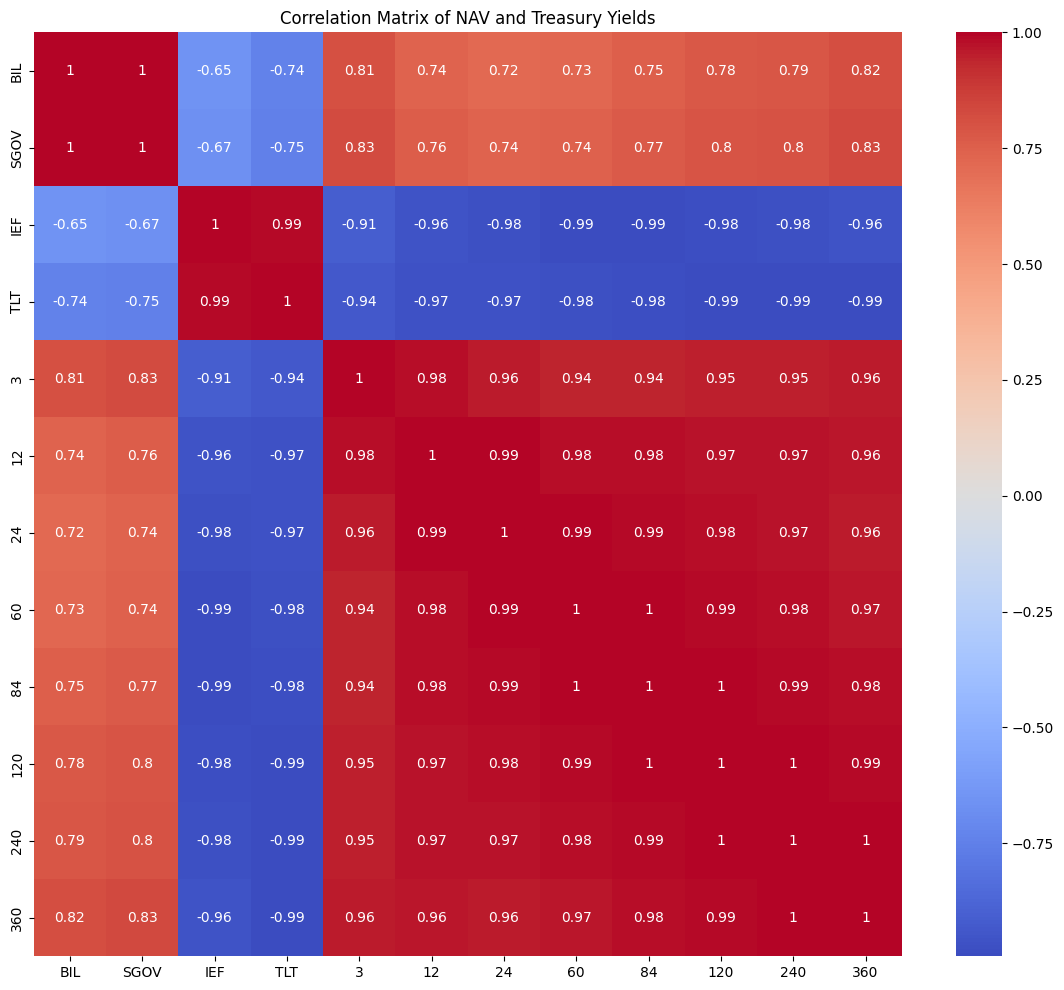

In [14]:
correlation_matrix = combined_data.corr()
plt.figure(figsize=(14, 12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of NAV and Treasury Yields')

plt.show()

In [22]:
future_df = pd.read_csv('/Users/evelynli/Documents/Work/ASL/ETF Hedging Data/Future prices/Future prices.csv')
future_df['Date'] = pd.to_datetime(future_df['Date'])
future_df.set_index('Date', inplace=True)
combined_data_1 = pd.merge(future_df, yield_df, left_index=True, right_index=True, how='left').dropna()

In [23]:
combined_data_1['FV'] = np.where(combined_data_1['FV1'] > combined_data_1['FV2'], combined_data_1['FV1'], combined_data_1['FV2'])
combined_data_1 = combined_data_1.drop(columns=['FV1', 'FV2'])

combined_data_1['SFR'] = combined_data_1[['SFR1', 'SFR2', 'SFR3', 'SFR4', 'SFR5']].max(axis=1)
combined_data_1 = combined_data_1.drop(columns=['SFR1', 'SFR2', 'SFR3', 'SFR4', 'SFR5'])

combined_data_1['TU'] = np.where(combined_data_1['TU1'] > combined_data_1['TU2'], combined_data_1['TU1'], combined_data_1['TU2'])
combined_data_1 = combined_data_1.drop(columns=['TU1', 'TU2'])

combined_data_1['TY'] = np.where(combined_data_1['TY1'] > combined_data_1['TY2'], combined_data_1['TY1'], combined_data_1['TY2'])
combined_data_1 = combined_data_1.drop(columns=['TY1', 'TY2'])

combined_data_1['US'] = np.where(combined_data_1['US1'] > combined_data_1['US2'], combined_data_1['US1'], combined_data_1['US2'])
combined_data_1 = combined_data_1.drop(columns=['US1', 'US2'])

combined_data_1 = combined_data_1[['FV', 'SFR', 'TU', 'TY', 'US', 'WN', '1', '3', '6', '12', '24', '36', '60', '72', '120', '240', '360']]


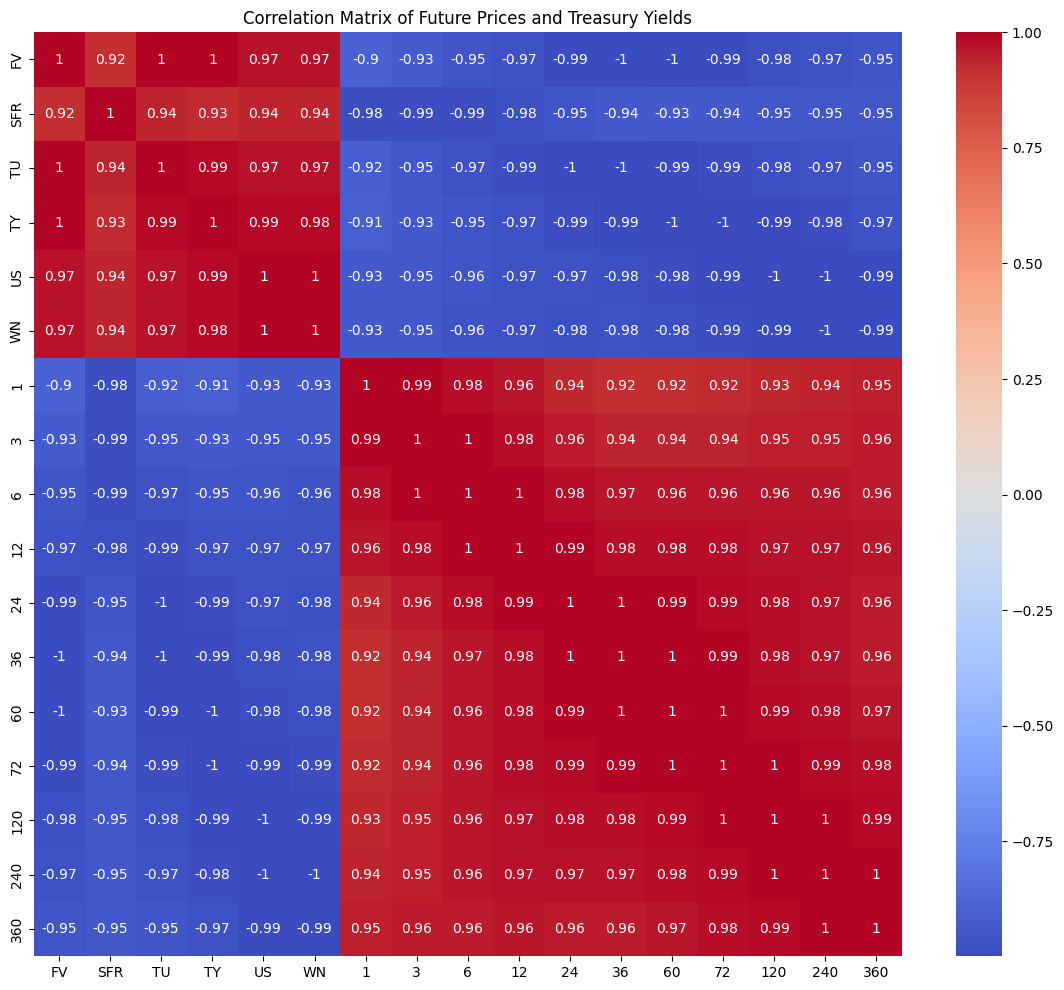

In [24]:
correlation_matrix_1 = combined_data_1.corr()
plt.figure(figsize=(14, 12)) 
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Future Prices and Treasury Yields')

plt.show()

In [33]:
combined_data_2 = pd.merge(etf_nav_df, future_df, left_index=True, right_index=True, how='left').dropna()
combined_data_2['FV'] = np.where(combined_data_2['FV1'] > combined_data_2['FV2'], combined_data_2['FV1'], combined_data_2['FV2'])
combined_data_2 = combined_data_2.drop(columns=['FV1', 'FV2'])

combined_data_2['SFR'] = combined_data_2[['SFR1', 'SFR2', 'SFR3', 'SFR4', 'SFR5']].max(axis=1)
combined_data_2 = combined_data_2.drop(columns=['SFR1', 'SFR2', 'SFR3', 'SFR4', 'SFR5'])

combined_data_2['TU'] = np.where(combined_data_2['TU1'] > combined_data_2['TU2'], combined_data_2['TU1'], combined_data_2['TU2'])
combined_data_2 = combined_data_2.drop(columns=['TU1', 'TU2'])

combined_data_2['TY'] = np.where(combined_data_2['TY1'] > combined_data_2['TY2'], combined_data_2['TY1'], combined_data_2['TY2'])
combined_data_2 = combined_data_2.drop(columns=['TY1', 'TY2'])

combined_data_2['US'] = np.where(combined_data_2['US1'] > combined_data_2['US2'], combined_data_2['US1'], combined_data_2['US2'])
combined_data_2 = combined_data_2.drop(columns=['US1', 'US2'])

combined_data_2 = combined_data_2[['BIL', 'IEF', 'SGOV', 'TLT', 'USFR', 'FV', 'SFR', 'TU', 'TY', 'US', 'WN']]

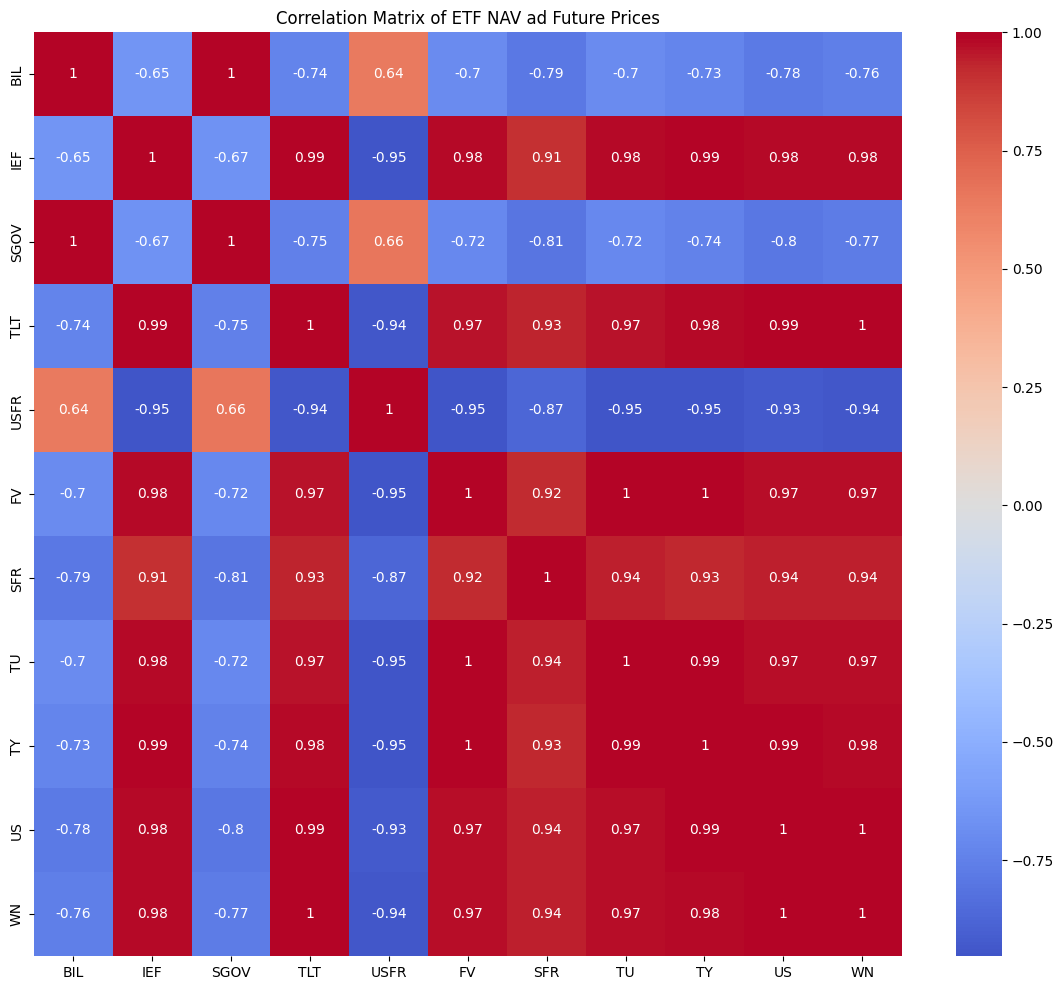

In [34]:
correlation_matrix_2 = combined_data_2.corr()
plt.figure(figsize=(14, 12)) 
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of ETF NAV ad Future Prices')

plt.show()